<a href="https://colab.research.google.com/github/Thierry-Hai-Son-ADAM/Markowitz_Portfolio_Optimization_Project/blob/main/Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import pandas_datareader as pdata
import statsmodels.api as smf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from google.colab import files
import seaborn as sns
from scipy import stats
import yfinance as yf
import datetime as dt
import dateutil.relativedelta as relativedelta

uploaded = files.upload()
filename = list(uploaded.keys())[0]

#Initializing Portfolio, AMUNDI and MSCI EMU datas
start_date = '2014-02-03'
end_date = '2024-01-29'
tickers = ['ASML', 'SAP', 'NVO', 'LVMUY', '^STOXX50E', 'TTE.PA', '^FCHI', 'SNY', 'GC=F', 'CC=F']

ptf_assets = yf.download(tickers, start=start_date, end=end_date)['Close']
ptf_assets=ptf_assets.dropna()

AM_MSCI_datas = pd.read_excel(filename, index_col = 0, usecols ='A:C')

AM_MSCI_datas.index = pd.to_datetime(AM_MSCI_datas.index, format='%d/%m/%Y')

AM_MSCI_datas = AM_MSCI_datas.loc[start_date:end_date]

display(AM_MSCI_datas)
display(ptf_assets)



[**********            20%                       ]  2 of 10 completed

Saving AMUNDI ACTIONS EURO Performances 2024.xlsx to AMUNDI ACTIONS EURO Performances 2024 (2).xlsx


[*********************100%***********************]  10 of 10 completed


,AMUNDI,MSCI EMU
Date,,
2014-02-03,100.000000,100.000000
2014-02-04,100.124108,99.959958
2014-02-05,100.152740,99.996100
2014-02-06,101.670643,101.718925
2014-02-07,102.596656,102.556028
...,...,...
2024-01-23,173.966587,188.038291
2024-01-24,176.085918,191.270576
2024-01-25,176.792362,191.892730


Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Date,,,,,,,,,,
2014-02-03,75.437439,2914.0,1260.400024,25.681013,15.848956,62.663574,30.430494,21.698456,4107.750000,2963.959961
2014-02-04,75.018158,2877.0,1251.699951,26.035236,15.869011,62.855515,30.480694,21.630915,4117.450195,2962.489990
2014-02-05,75.972725,2884.0,1257.300049,26.160681,16.458384,62.613491,30.298733,21.758205,4117.790039,2962.510010
2014-02-06,77.471458,2886.0,1257.599976,26.684637,16.815214,63.656635,29.972467,22.176430,4188.100098,3010.790039
2014-02-07,78.113808,2922.0,1263.300049,27.024094,17.180067,63.998806,30.386570,22.430998,4228.180176,3038.489990
...,...,...,...,...,...,...,...,...,...,...
2024-01-22,756.626404,4565.0,2019.800049,143.042953,102.689056,161.187271,46.694180,54.103981,7413.250000,4480.319824
2024-01-23,768.182922,4634.0,2023.699951,144.221695,102.572243,161.355164,45.830658,54.450623,7388.040039,4465.910156
2024-01-24,836.199097,4785.0,2013.900024,148.035233,102.416489,172.445969,45.830658,55.143902,7455.640137,4564.109863


In [18]:
#Base 100

ptf_assets = ptf_assets / ptf_assets.iloc[0] *100
display(ptf_assets)

Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Date,,,,,,,,,,
2014-02-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-02-04,99.444200,98.730268,99.309737,101.379320,100.126537,100.306303,100.164964,99.688728,100.236144,99.950405
2014-02-05,100.709576,98.970487,99.754048,101.867791,103.845221,99.920076,99.567008,100.275363,100.244417,99.951081
2014-02-06,102.696300,99.039121,99.777844,103.908039,106.096667,101.584750,98.494842,102.202802,101.956061,101.579983
2014-02-07,103.547799,100.274537,100.230088,105.229858,108.398730,102.130794,99.855657,103.376010,102.931780,102.514542
...,...,...,...,...,...,...,...,...,...,...
2024-01-22,1002.985274,156.657515,160.250715,556.998873,647.923155,257.226424,153.445353,249.344845,180.469844,151.159931
2024-01-23,1018.304615,159.025395,160.560133,561.588806,647.186111,257.494351,150.607668,250.942385,179.856127,150.673768
2024-01-24,1108.466974,164.207275,159.782608,576.438445,646.203371,275.193317,150.607668,254.137448,181.501799,153.986893


In [33]:
ptf_log_returns = np.log(ptf_assets/ptf_assets.shift(1)).dropna()
display(ptf_log_returns)

ptf_yearly_log_returns = ptf_log_returns.resample('YE').last()
display(ptf_yearly_log_returns)

ptf_daily_returns = ptf_log_returns.dot(ptf_weights)
display(ptf_daily_returns)

AM_MSCI_daily_returns = AM_MSCI_datas.pct_change().dropna()
display(AM_MSCI_daily_returns)

Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Date,,,,,,,,,,
2014-02-04,-0.005573,-0.012779,-0.006927,0.013699,0.001265,0.003058,0.001648,-0.003118,0.002359,-0.000496
2014-02-05,0.012644,0.002430,0.004464,0.004807,0.036467,-0.003858,-0.005988,0.005867,0.000083,0.000007
2014-02-06,0.019535,0.000693,0.000239,0.019830,0.021449,0.016523,-0.010827,0.019039,0.016931,0.016166
2014-02-07,0.008257,0.012397,0.004522,0.012641,0.021466,0.005361,0.013722,0.011414,0.009524,0.009158
2014-02-10,-0.000228,-0.004115,0.009062,-0.004653,0.001865,-0.004968,-0.006629,-0.005341,0.002114,-0.001963
...,...,...,...,...,...,...,...,...,...,...
2024-01-22,0.011610,-0.003935,-0.003312,-0.003042,-0.013839,-0.001469,-0.003927,-0.009136,0.005629,0.007053
2024-01-23,0.015158,0.015002,0.001929,0.008207,-0.001138,0.001041,-0.018666,0.006387,-0.003406,-0.003221
2024-01-24,0.084839,0.032066,-0.004854,0.026099,-0.001520,0.066476,0.000000,0.012652,0.009108,0.021750


Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Date,,,,,,,,,,
2014-12-31,-0.008558,0.002021,0.018755,-0.007482,-0.001171,-0.007077,-0.005248,-0.028051,-0.016221,-0.017863
2015-12-31,-0.006330,0.005590,-0.016280,-0.007467,-0.000851,-0.009438,-0.008944,-0.013739,-0.005165,-0.007967
2016-12-31,0.009312,-0.018178,-0.005550,0.009787,0.001116,-0.000925,0.018216,0.001746,0.004915,0.005718
2017-12-31,-0.002184,-0.009992,0.009383,-0.009832,-0.001117,-0.000356,-0.001394,-0.006278,-0.005043,-0.005791
2018-12-31,0.004524,0.014642,0.002033,0.008135,0.005250,0.002119,0.007244,0.016077,0.017275,0.016601
2019-12-31,-0.006018,-0.013710,0.000462,-0.002575,-0.009139,-0.011849,-0.013261,-0.002132,-0.009180,-0.008977
2020-12-31,0.012116,0.035270,0.005994,0.002944,-0.005399,0.005296,0.002070,-0.005045,-0.002208,-0.002735
2021-12-31,-0.002197,0.017344,0.004201,-0.003689,0.002605,0.002567,-0.001189,0.003234,0.001634,0.004945
2022-12-31,-0.009236,0.008498,0.000110,-0.020970,0.001035,-0.008876,-0.002475,-0.012370,-0.015285,-0.014771


,0
Date,
2014-02-04,0.000304
2014-02-05,0.012909
2014-02-06,0.015333
2014-02-07,0.012070
2014-02-10,0.000160
...,...
2024-01-22,-0.002582
2024-01-23,0.005757
2024-01-24,0.026051


,AMUNDI,MSCI EMU
Date,,
2014-02-04,0.001241,-0.000400
2014-02-05,0.000286,0.000362
2014-02-06,0.015156,0.017229
2014-02-07,0.009108,0.008230
2014-02-10,-0.001768,-0.000776
...,...,...
2024-01-23,-0.002518,-0.002761
2024-01-24,0.012182,0.017190
2024-01-25,0.004012,0.003253


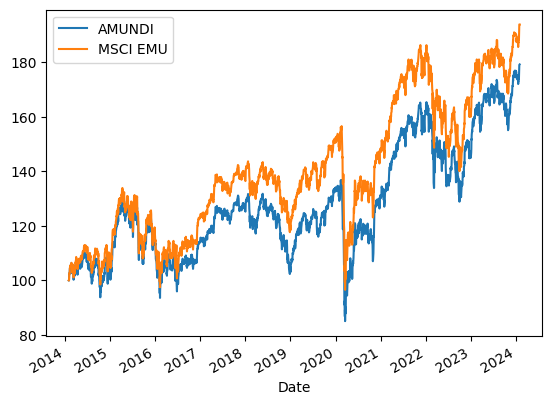

In [35]:
# Plot performances

AM_MSCI_datas.plot(label="Tracker")

plt.legend()
plt.show()

In [21]:
#Compute Average Return
ptf_avg_return = ptf_daily_returns.mean()
print("Portfolio Average Return in % : ", ptf_avg_return*252*100,"\n")

AM_MSCI_datas_avg_return = AM_MSCI_daily_returns.mean()
display("AMUNDI & MSCI Average Return in % : ", AM_MSCI_datas_avg_return*252*100)

Portfolio Average Return in % :  16.376980778680903 



'AMUNDI & MSCI Average Return in % : '

,0
AMUNDI,7.623234
MSCI EMU,8.420153


In [22]:
#Use a yearly base
ptf_yearly_return = ptf_daily_returns.resample('YE').last()
AM_MSCI_yearly_return = AM_MSCI_daily_returns.resample('YE').last()
display("Portfolio Yearly Return in % : ", ptf_yearly_return*100)
display("AMUNDI & MSCI Yearly Return in % : ", AM_MSCI_yearly_return*100)

#Cov matrix
ptf_cov_mat = ptf_log_returns.cov()*252
display("\nPortfolio Covariance Matrix: ", ptf_cov_mat)

#Correlation matrix
ptf_corr_mat = ptf_log_returns.corr()
display("\nCorrelation Matrix: ", ptf_corr_mat)

#Mean and std dev
ptf_mean = ptf_daily_returns.mean()*252*100
AM_MSCI_mean = AM_MSCI_daily_returns.mean()*252*100
ptf_std_dev = ptf_daily_returns.std()*252**0.5*100
#ptf_std_dev_2 = np.sqrt(np.dot(ptf_weights.T,np.dot(ptf_cov_mat, ptf_weights)))*100
AM_MSCI_std_dev = AM_MSCI_daily_returns.std()*252**0.5*100

print("Portfolio Mean :", ptf_mean)
print("Portfolio STD DEV: ", ptf_std_dev)
#print("Portfolio STD DEV: ", ptf_std_dev_2)


print("\nAMUNDI & MSCI Mean :\n", AM_MSCI_mean)
print("AMUNDI & MSCI STD DEV: \n", AM_MSCI_std_dev)




'Portfolio Yearly Return in % : '

,0
Date,
2014-12-31,-0.461228
2015-12-31,-0.491622
2016-12-31,0.272584
2017-12-31,-0.403815
2018-12-31,0.781477
2019-12-31,-0.657180
2020-12-31,0.538478
2021-12-31,0.179293
2022-12-31,-0.731710


'AMUNDI & MSCI Yearly Return in % : '

,AMUNDI,MSCI EMU
Date,,
2014-12-31,0.395290,0.326938
2015-12-31,-0.489713,-0.567399
2016-12-31,0.293603,0.362628
2017-12-31,-0.408690,-0.533899
2018-12-31,0.558251,0.529602
2019-12-31,-0.129509,-0.138478
2020-12-31,-0.648877,-0.534818
2021-12-31,-0.176637,-0.157645
2022-12-31,-1.370753,-1.393603


'\nPortfolio Covariance Matrix: '

Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Ticker,,,,,,,,,,
ASML,0.125547,0.007065,0.003936,0.061465,0.029379,0.055363,0.027784,0.028001,0.032210,0.035542
CC=F,0.007065,0.071456,0.003294,0.006455,0.004473,0.007491,0.003863,0.009890,0.005863,0.005816
GC=F,0.003936,0.003294,0.021595,0.001543,0.001973,0.003424,0.001236,-0.000761,-0.002686,-0.002500
LVMUY,0.061465,0.006455,0.001543,0.088118,0.026061,0.046532,0.027601,0.033004,0.037473,0.036953
NVO,0.029379,0.004473,0.001973,0.026061,0.072411,0.023479,0.025718,0.010584,0.014484,0.014919
SAP,0.055363,0.007491,0.003424,0.046532,0.023479,0.071833,0.025183,0.024691,0.027058,0.029368
SNY,0.027784,0.003863,0.001236,0.027601,0.025718,0.025183,0.055818,0.019498,0.020349,0.020117
TTE.PA,0.028001,0.009890,-0.000761,0.033004,0.010584,0.024691,0.019498,0.081098,0.040185,0.039639
^FCHI,0.032210,0.005863,-0.002686,0.037473,0.014484,0.027058,0.020349,0.040185,0.038041,0.038031


'\nCorrelation Matrix: '

Ticker,ASML,CC=F,GC=F,LVMUY,NVO,SAP,SNY,TTE.PA,^FCHI,^STOXX50E
Ticker,,,,,,,,,,
ASML,1.000000,0.074587,0.075586,0.584375,0.308125,0.582981,0.331902,0.277505,0.466080,0.504697
CC=F,0.074587,1.000000,0.083842,0.081351,0.062183,0.104556,0.061161,0.129923,0.112455,0.109478
GC=F,0.075586,0.083842,1.000000,0.035382,0.049901,0.086945,0.035599,-0.018188,-0.093708,-0.085596
LVMUY,0.584375,0.081351,0.035382,1.000000,0.326255,0.584870,0.393552,0.390418,0.647228,0.626339
NVO,0.308125,0.062183,0.049901,0.326255,1.000000,0.325546,0.404534,0.138109,0.275967,0.278961
SAP,0.582981,0.104556,0.086945,0.584870,0.325546,1.000000,0.397700,0.323491,0.517621,0.551324
SNY,0.331902,0.061161,0.035599,0.393552,0.404534,0.397700,1.000000,0.289806,0.441611,0.428431
TTE.PA,0.277505,0.129923,-0.018188,0.390418,0.138109,0.323491,0.289806,1.000000,0.723486,0.700347
^FCHI,0.466080,0.112455,-0.093708,0.647228,0.275967,0.517621,0.441611,0.723486,1.000000,0.981078


Portfolio Mean : 16.376980778680903
Portfolio STD DEV:  18.55045414751311

AMUNDI & MSCI Mean :
 AMUNDI      7.623234
MSCI EMU    8.420153
dtype: float64
AMUNDI & MSCI STD DEV: 
 AMUNDI      18.550890
MSCI EMU    18.565969
dtype: float64


In [23]:
#Creating epty array to store simulations data and set the numbers of simulations
nb_simulations = 100000
ptf_weights_sim = np.zeros((nb_simulations, len(ptf_assets.columns)))
ptf_returns_sim = np.zeros(nb_simulations)
ptf_risks_sim = np.zeros(nb_simulations)
ptf_sharpe_sim = np.zeros(nb_simulations)

for i in range(nb_simulations):
    weights_sim = np.random.uniform(size = len(ptf_assets.columns))
    weights_sim = weights_sim / np.sum(weights_sim)

    ptf_weights_sim[i,:] = weights_sim

    ptf_returns = np.sum(ptf_log_returns.mean() * weights_sim)
    ptf_returns = (ptf_returns+1)**252-1

    ptf_returns_sim[i] = ptf_returns

    ptf_std_dev_sim = np.sqrt(np.dot(weights_sim.T,np.dot(ptf_cov_mat, weights_sim)))
    ptf_risks_sim[i] = ptf_std_dev_sim

    sharpe_ratio = ptf_returns/ptf_std_dev_sim
    ptf_sharpe_sim[i] = sharpe_ratio

names = ptf_assets.columns
min_var = ptf_weights_sim[ptf_risks_sim.argmin()]
ptf_min_var = min_var.min()

print("Lowest Variance in simulations by asset: \n", min_var)

max_sharpe = ptf_weights_sim[ptf_sharpe_sim.argmax()]

ptf_max_sharpe = max_sharpe.max()

print("\nHighest Sharpe Ratio in simulations by asset in ptf: \n", max_sharpe)

#print("\nLowest ptf risk in simulations: \n", ptf_risks_sim.min())
#print("\nHighest Sharpe Ratio in simulations: \n", ptf_sharpe_sim.max())

AM_MSCI_sharpe = AM_MSCI_daily_returns.mean()/AM_MSCI_daily_returns.std()
print("\nAMUNDI & MSCI Sharpe Ratio: \n", AM_MSCI_sharpe)



Lowest Variance in simulations by asset: 
 [0.0040767  0.13465871 0.31912899 0.02169746 0.07673278 0.05462369
 0.08392292 0.04793994 0.10915784 0.14806098]

Highest Sharpe Ratio in simulations by asset in ptf: 
 [0.18577521 0.06578209 0.1633826  0.22088437 0.23263944 0.03029235
 0.00087182 0.04193616 0.02000874 0.03842722]

AMUNDI & MSCI Sharpe Ratio: 
 AMUNDI      0.025887
MSCI EMU    0.028569
dtype: float64


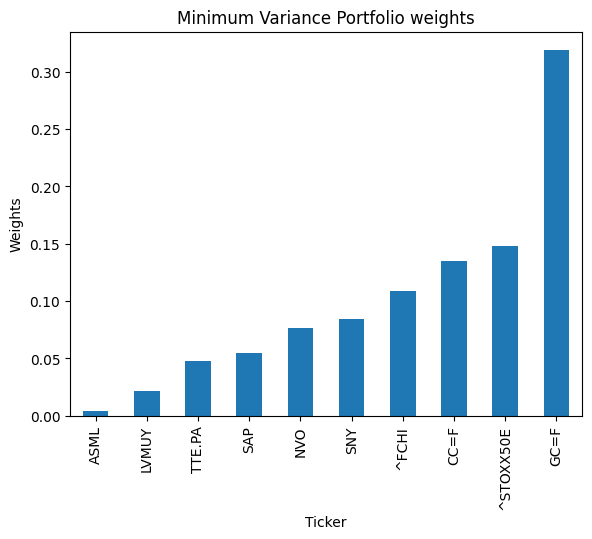

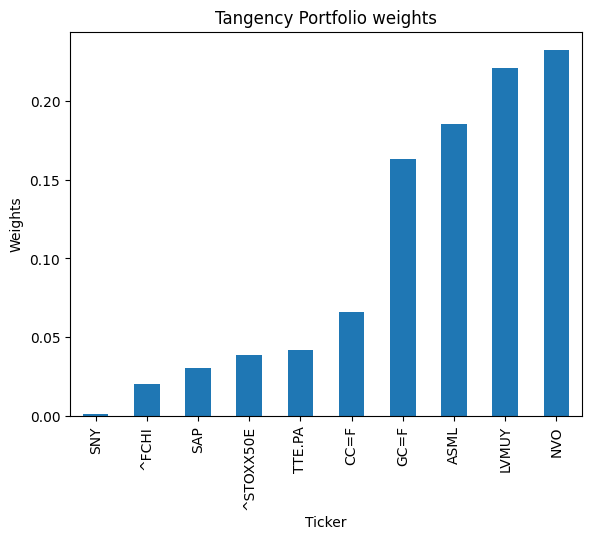

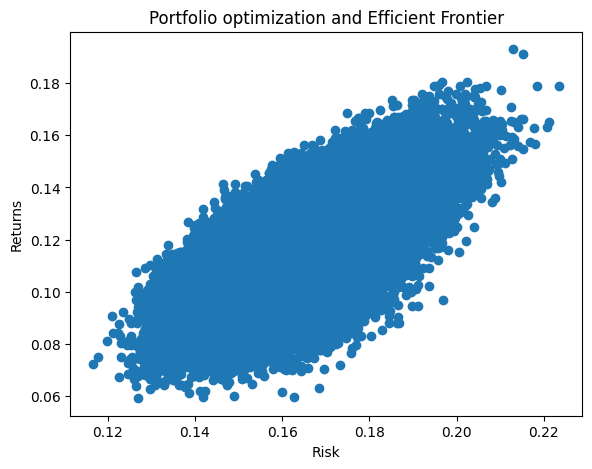

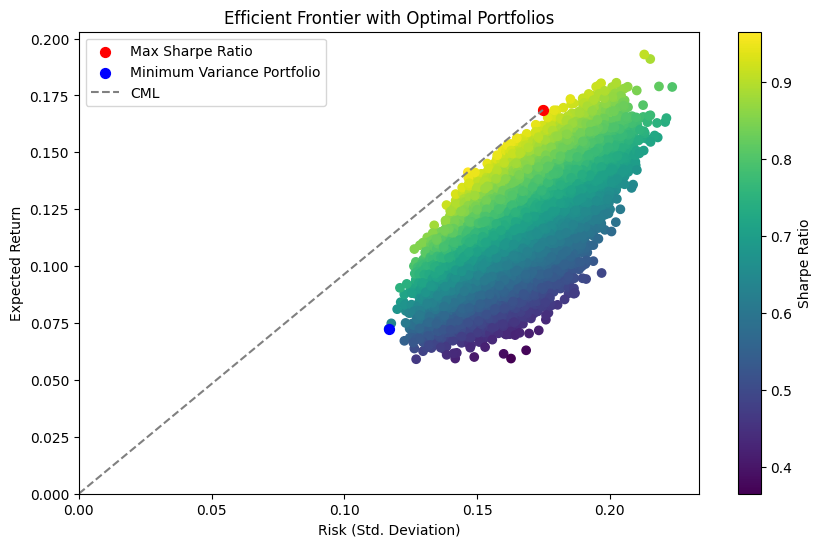

Optimized Weights for Maximum Sharpe Ratio Portfolio: [0.18577521 0.06578209 0.1633826  0.22088437 0.23263944 0.03029235
 0.00087182 0.04193616 0.02000874 0.03842722]
Optimized Weights for Minimum Variance Portfolio: [0.0040767  0.13465871 0.31912899 0.02169746 0.07673278 0.05462369
 0.08392292 0.04793994 0.10915784 0.14806098]
Optimized Weights for Maximum Sharpe Ratio Portfolio:
Ticker
SNY          0.000872
^FCHI        0.020009
SAP          0.030292
^STOXX50E    0.038427
TTE.PA       0.041936
CC=F         0.065782
GC=F         0.163383
ASML         0.185775
LVMUY        0.220884
NVO          0.232639
dtype: float64
Optimized Weights for Minimum Variance Portfolio:
Ticker
ASML         0.004077
CC=F         0.134659
GC=F         0.319129
LVMUY        0.021697
NVO          0.076733
SAP          0.054624
SNY          0.083923
TTE.PA       0.047940
^FCHI        0.109158
^STOXX50E    0.148061
dtype: float64
Assets:
['ASML', 'CC=F', 'GC=F', 'LVMUY', 'NVO', 'SAP', 'SNY', 'TTE.PA', '^FCHI', 

In [36]:

#plot the asset allocation depending on Sharpe Ratio and Risk
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')


max_sharpe = pd.Series(max_sharpe, index=names)
max_sharpe = max_sharpe.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sharpe.plot(kind = 'bar')


#Plot all the portfolio
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(ptf_risks_sim, ptf_returns_sim)


# Extract the portfolio with maximum Sharpe ratio and minimum variance portfolio
max_sharpe_idx = ptf_sharpe_sim.argmax()
max_sharpe_risk = ptf_risks_sim[max_sharpe_idx]
max_sharpe_return = ptf_returns_sim[max_sharpe_idx]

mvp_idx = ptf_risks_sim.argmin()
mvp_risk = ptf_risks_sim[mvp_idx]
mvp_return = ptf_returns_sim[mvp_idx]

# Plot portfolios
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ptf_risks_sim, ptf_returns_sim, c=ptf_sharpe_sim, cmap='viridis')
plt.colorbar(scatter, label='Sharpe Ratio')
plt.scatter(max_sharpe_risk, max_sharpe_return, color='red', s=50, label='Max Sharpe Ratio')
plt.scatter(mvp_risk, mvp_return, color='blue', s=50, label='Minimum Variance Portfolio')

# Plot the Capital Market Line (CML)
x_values = [0, max_sharpe_risk]
y_values = [0, max_sharpe_return]
plt.plot(x_values, y_values, linestyle='--', color='gray', label='CML')

plt.xlabel('Risk (Std. Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Optimal Portfolios')
plt.xlim([0, ptf_risks_sim.max() + 0.01])
plt.ylim([0, ptf_returns_sim.max() + 0.01])
plt.legend()
plt.show()

# Get the index of the portfolio with the highest Sharpe ratio
max_sharpe_idx = ptf_sharpe_sim.argmax()

# Extract the weights for that portfolio from the simulation array
optimal_weights_sharpe = ptf_weights_sim[max_sharpe_idx]
print("Optimized Weights for Maximum Sharpe Ratio Portfolio:", optimal_weights_sharpe)

# Get the index of the portfolio with the lowest risk (minimum variance)
mvp_idx = ptf_risks_sim.argmin()

# Extract the weights for the minimum variance portfolio
optimal_weights_mvp = ptf_weights_sim[mvp_idx]
print("Optimized Weights for Minimum Variance Portfolio:", optimal_weights_mvp)
optimal_weights_mvp_series = pd.Series(optimal_weights_mvp, index=names)
optimal_weights_sharpe_series = pd.Series(optimal_weights_sharpe, index=names)

# Sort and display the Series
print("Optimized Weights for Maximum Sharpe Ratio Portfolio:")
optimal_weights_sharpe_series = optimal_weights_sharpe_series.sort_values()
print(optimal_weights_sharpe_series)
print("Optimized Weights for Minimum Variance Portfolio:")
print(optimal_weights_mvp_series)
optimal_weights_mvp_list = [round(w, 8) for w in optimal_weights_mvp]
optimal_weights_sharpe_list = [round(w, 8) for w in optimal_weights_sharpe]
print("Assets:")
print(list(ptf_assets.columns))


# Print the corresponding weights as a list
print("\nOptimized Weights for Minimum Variance Portfolio:")
print(optimal_weights_mvp_list)

# Print asset names
print("Assets:")
print(list(ptf_assets.columns))
print("\nOptimized Weights for Maximum Sharpe Ratio Portfolio:")
print(optimal_weights_sharpe_list)



[np.float64(0.18577521),
 np.float64(0.06578209),
 np.float64(0.1633826),
 np.float64(0.22088437),
 np.float64(0.23263944),
 np.float64(0.03029235),
 np.float64(0.00087182),
 np.float64(0.04193616),
 np.float64(0.02000874),
 np.float64(0.03842722)]

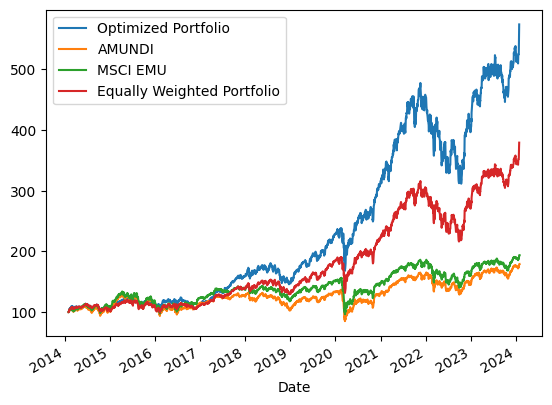

In [37]:
ptf_weights = optimal_weights_sharpe_list
ptf_equaly_weighted = np.array([1/len(tickers)]*len(tickers))
display(ptf_weights)

ptf_log_returns = np.log(ptf_assets/ptf_assets.shift(1)).dropna()
#display(ptf_log_returns)

ptf_yearly_log_returns = ptf_log_returns.resample('YE').last()
#display(ptf_yearly_log_returns)

ptf_daily_returns = ptf_log_returns.dot(ptf_weights)
#display(ptf_daily_returns)

equal_ptf_daily_returns = ptf_log_returns.dot(ptf_equaly_weighted)
#display(equal_ptf_daily_returns)

ptf_daily_perf = ptf_assets.dot(ptf_weights)
#display(ptf_daily_perf)

equal_ptf_daily_perf = ptf_assets.dot(ptf_equaly_weighted)
#display(equal_ptf_daily_perf)

AM_MSCI_daily_returns = AM_MSCI_datas.pct_change().dropna()
#display(AM_MSCI_daily_returns)

# Plot the portfolio performance first and get the axes object
ax = ptf_daily_perf.plot(label="Optimized Portfolio")

# Plot the tracker data on the same axes
AM_MSCI_datas.plot(ax=ax, label="Tracker")

ax=equal_ptf_daily_perf.plot(label='Equally Weighted Portfolio')

# Add a legend and show the plot
plt.legend()
plt.show()